In [6]:
import sys
import os
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


In [2]:
#params

plot_N2_profiles=True


In [3]:
config='EU36'
case='MPC001'
freq='1d'
year='2011'

list_dates=['m03d15','m09d15']

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'


In [4]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


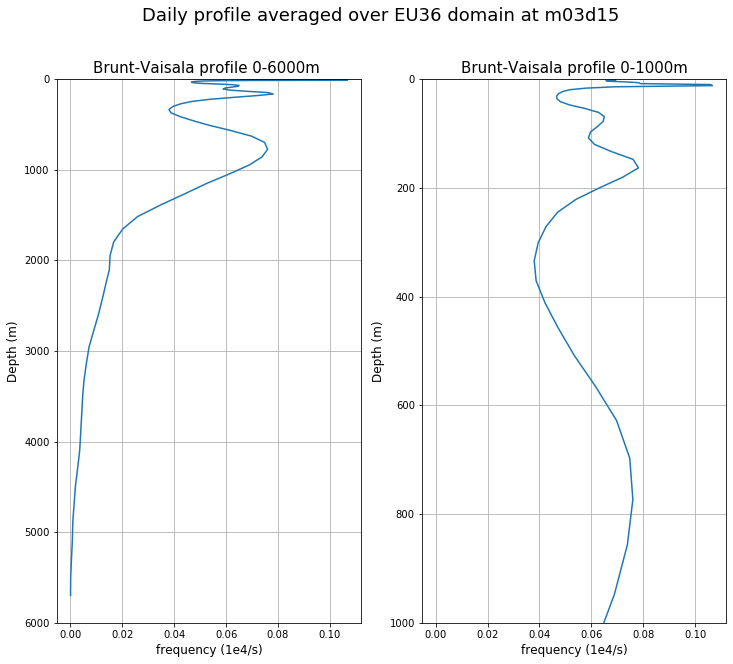

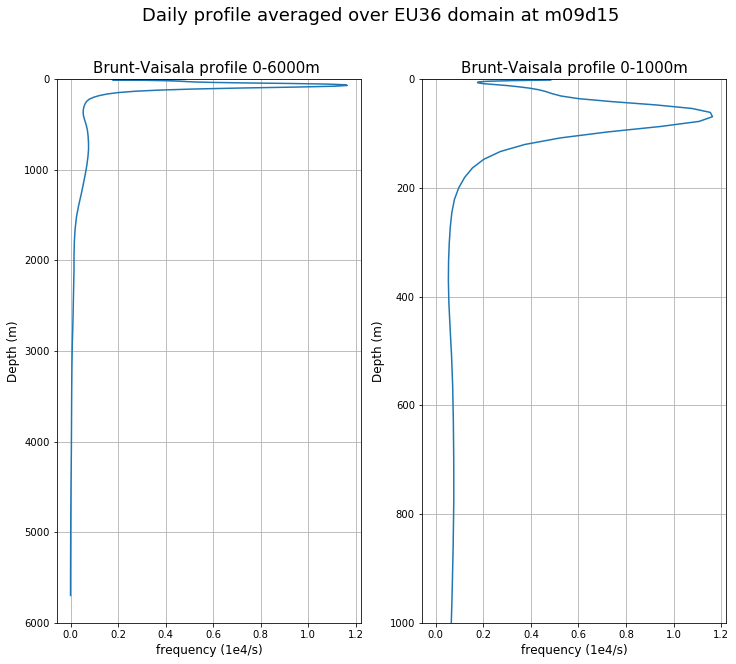

In [13]:
if plot_N2_profiles==True:
    for date in list_dates:
        fileT=datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+str(date)+'.'+str(freq)+'_gridT.nc'
        filebn2='/scratch/cnt0024/hmg2840/albert7a/tmp/'+str(config)+'-'+str(case)+'_y'+str(year)+str(date)+'.'+str(freq)+'_bn2.nc'
        if not os.path.exists(filebn2):
            !ln -sf $maskfile mesh_hgr.nc
            !ln -sf $maskfile mesh_zgr.nc
            !cdfbn2 -t $fileT -o $filebn2
            ! rm mesh*
        ds=xr.open_dataset(filebn2, chunks={'x':700,'y':1000,'time_counter':1,'deptht':1})
        bn2=ds.vobn2
        fig, axes = plt.subplots(1,2,figsize=(12,10))
        axes = axes.ravel()
        ax=axes[0]
        bn2_scale=10000*bn2
        bn2_scale.mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax)
        ax.set_ylim(6000,0)
        ax.set_ylabel('Depth (m)',fontsize=12)
        ax.set_xlabel('frequency (1e4/s)',fontsize=12)
        ax.grid()
        ax.set_title('Brunt-Vaisala profile 0-6000m ',fontsize=15)
        ax=axes[1]
        bn2_scale=10000*bn2
        bn2_scale.mean(dim='x').mean(dim='y').plot(y='deptht', yincrease=False,ax=ax)
        ax.set_ylim(1000,0)
        ax.set_ylabel('Depth (m)',fontsize=12)
        ax.set_xlabel('frequency (1e4/s)',fontsize=12)
        ax.grid()
        ax.set_title('Brunt-Vaisala profile 0-1000m',fontsize=15)
        fig.suptitle('Daily profile averaged over '+config+' domain at '+date, fontsize=18)
        plt.savefig('Plots/EU36/Profiles/'+config+'-'+case+'y'+str(year)+str(date)+'_mean-N2-profile.png')